In [4]:
#import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB

In [5]:
#read csv file
df=pd.read_csv('/content/cleaned_data1.csv')
df.head(5)

,date,month,customer_code,product_code,division,segment,category,product,variant,customer,market,platform,channel,sub_zone,region,quantity,manufacturing_cost,freight_cost,net_sales_amount,holiday_count
0,2018-09-01,September,90023030,A0418150108,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Canada,E-Commerce,Retailer,NaN,NaN,16,85.4272,4.0503,163.98,0
1,2018-09-01,September,90010046,A0418150108,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Bangladesh,E-Commerce,Retailer,ROA,APAC,3,16.0176,0.7408,24.53,0
2,2018-09-01,September,90023023,A0418150108,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Canada,E-Commerce,Retailer,NaN,NaN,31,165.5152,7.6096,308.08,0
3,2018-09-01,September,90012041,A0418150108,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Germany,E-Commerce,Retailer,NE,EU,18,96.1056,4.5517,155.88,0
4,2018-09-01,September,90014141,A0418150108,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Netherlands,E-Commerce,Retailer,NE,EU,2,10.6784,0.5055,18.12,0


In [6]:
#filter the data
filtered_data = df.groupby(['month', 'product', 'variant','market','platform', 'channel']).agg({
    'quantity': 'sum'
}).reset_index()

filtered_data.head()


,month,product,variant,market,platform,channel,quantity
0,April,AQ 5000 Series Electron 8 5900X Desktop Processor,Plus,Australia,Brick & Mortar,Retailer,167
1,April,AQ 5000 Series Electron 8 5900X Desktop Processor,Plus,Australia,E-Commerce,Direct,61
2,April,AQ 5000 Series Electron 8 5900X Desktop Processor,Plus,Australia,E-Commerce,Retailer,63
3,April,AQ 5000 Series Electron 8 5900X Desktop Processor,Plus,Austria,Brick & Mortar,Retailer,15
4,April,AQ 5000 Series Electron 8 5900X Desktop Processor,Plus,Austria,E-Commerce,Direct,10


In [7]:
#find its shape
filtered_data.shape

(215453, 7)

In [8]:
#one hot encoding for categorical variables
filtered_data = pd.get_dummies(filtered_data, columns=['product', 'variant', 'market', 'platform', 'channel'], prefix=None, dtype=int)
filtered_data.columns = filtered_data.columns.str.split('_').str[-1]

filtered_data.head()

,month,quantity,AQ 5000 Series Electron 8 5900X Desktop Processor,AQ 5000 Series Electron 9 5900X Desktop Processor,AQ 5000 Series Ultron 8 5900X Desktop Processor,AQ Aspiron,AQ Clx1,AQ Clx2,AQ Clx3,AQ Digit,...,South Korea,Spain,Sweden,USA,United Kingdom,Brick & Mortar,E-Commerce,Direct,Distributor,Retailer
0,April,167,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,April,61,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2,April,63,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,April,15,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,April,10,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [9]:
#label encoding for ordered column 'month'
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

filtered_data['month'] = Le.fit_transform(filtered_data['month'])

In [10]:
filtered_data.head(5)

,month,quantity,AQ 5000 Series Electron 8 5900X Desktop Processor,AQ 5000 Series Electron 9 5900X Desktop Processor,AQ 5000 Series Ultron 8 5900X Desktop Processor,AQ Aspiron,AQ Clx1,AQ Clx2,AQ Clx3,AQ Digit,...,South Korea,Spain,Sweden,USA,United Kingdom,Brick & Mortar,E-Commerce,Direct,Distributor,Retailer
0,0,167,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0,61,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2,0,63,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,15,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0,10,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [11]:
# Define a function to categorize the quantity
def categorize_sales(quantity):
    if quantity <= 1000:
        return "Low sales"
    elif 1000 < quantity <= 25000:
        return "Medium sales"
    else:
        return "High sales"

# Apply the categorization function to create a new column 'sales_range'
filtered_data['sales_range'] = filtered_data['quantity'].apply(categorize_sales)

In [12]:
#drop the column
filtered_data.drop(columns='quantity',inplace=True)

In [13]:
#label encoding quantity
filtered_data['sales_range'] = Le.fit_transform(filtered_data['sales_range'])

In [14]:
filtered_data.head()

,month,AQ 5000 Series Electron 8 5900X Desktop Processor,AQ 5000 Series Electron 9 5900X Desktop Processor,AQ 5000 Series Ultron 8 5900X Desktop Processor,AQ Aspiron,AQ Clx1,AQ Clx2,AQ Clx3,AQ Digit,AQ Digit SSD,...,Spain,Sweden,USA,United Kingdom,Brick & Mortar,E-Commerce,Direct,Distributor,Retailer,sales_range
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1


In [15]:
filtered_data.to_csv('/content/naive_bayes_prep_data.csv')

In [24]:
#Separate  X and Y
X = filtered_data.drop("sales_range", axis = 1)
y = filtered_data['sales_range']


In [25]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the Naive Bayes classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predicting on the test data
y_pred = nb_model.predict(X_test)

# Evaluating the model using accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6706504838597387


In [26]:
# Initializing and training the Naive Bayes classifier
nb_multi_model = MultinomialNB()
nb_multi_model.fit(X_train, y_train)

# Predicting on the test data
y_pred_1 = nb_multi_model.predict(X_test)

# Evaluating the model using accuracy
accuracy_1 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_1)

Accuracy: 0.6706504838597387


In [27]:
training_data = pd.concat([X_train, y_train], axis=1)
training_data.head()

,month,AQ 5000 Series Electron 8 5900X Desktop Processor,AQ 5000 Series Electron 9 5900X Desktop Processor,AQ 5000 Series Ultron 8 5900X Desktop Processor,AQ Aspiron,AQ Clx1,AQ Clx2,AQ Clx3,AQ Digit,AQ Digit SSD,...,Spain,Sweden,USA,United Kingdom,Brick & Mortar,E-Commerce,Direct,Distributor,Retailer,sales_range
187594,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
74864,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
38600,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
24550,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
159878,8,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,1


In [28]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data.head()

,month,AQ 5000 Series Electron 8 5900X Desktop Processor,AQ 5000 Series Electron 9 5900X Desktop Processor,AQ 5000 Series Ultron 8 5900X Desktop Processor,AQ Aspiron,AQ Clx1,AQ Clx2,AQ Clx3,AQ Digit,AQ Digit SSD,...,Spain,Sweden,USA,United Kingdom,Brick & Mortar,E-Commerce,Direct,Distributor,Retailer,sales_range
154153,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,2
37657,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,1
53407,2,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,2
6049,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
207169,11,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,1


In [29]:
y_pred_df = pd.DataFrame(y_pred, columns=['Predicted'])
y_test_df = pd.DataFrame(np.array(y_test), columns=['Actual'])

# Concatenate the DataFrames to compare predicted and actual values side by side
comparison_df = pd.concat([y_pred_df, y_test_df], axis=1)
comparison_df.head(10)

,Predicted,Actual
0,2,2
1,1,1
2,2,2
3,2,1
4,1,1
5,1,1
6,2,1
7,2,1
8,1,1
9,1,1


In [30]:
from sklearn.metrics import confusion_matrix, classification_report

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
conf_matrix


Confusion Matrix:


array([[    1,     0,     0],
       [    0, 26102, 14149],
       [   24,    19,  2796]])

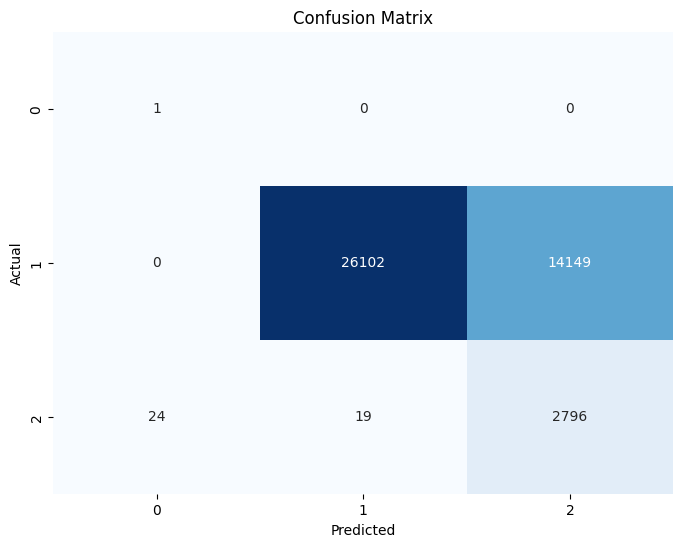

In [31]:
# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()